# How does TVL on Curve correlate to TVL on Convex?

In this analysis, we will be looking at the TVL (total value locked) defined as the amount of assets that are in a protocol at a given time for both Curve and Convex Finance. The main objective will be if the two protocols TVL correlate. This is a bount submission for MetricsDAO. Date range is from the launch of Convex. (0 equals first day Convex launch, 250 equals 249th day Convex has been live)

In [216]:
#python packages
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

Inputting source data from excel files downloaded of Defi Llama

In [217]:
#Data is source from Defi llama 2/17/2022 for TVL - total and ETH (not including staking)
#Input file can be found in my github
df_convex = pd.read_excel('TVL.xlsx',sheet_name = 'Convex')
df_curve = pd.read_excel('TVL.xlsx',sheet_name = 'Curve')
df_aave  =pd.read_excel('TVL.xlsx',sheet_name = 'Aave')
df_uniswap = pd.read_excel('TVL.xlsx', sheet_name = 'Uniswap')
df_compound = pd.read_excel('TVL.xlsx',sheet_name = 'Compound')
df_maker = pd.read_excel('TVL.xlsx',sheet_name = 'MakerDAO' )
df_yearn = pd.read_excel('TVL.xlsx',sheet_name = 'Yearn')

Looking at convex variables

In [218]:
df_convex

,Date,Convex Finance,Convex Finance (Staking)
0,17/05/2021,6.887735e+07,NaN
1,18/05/2021,7.133614e+07,NaN
2,19/05/2021,2.050221e+08,NaN
3,20/05/2021,1.905626e+08,NaN
4,21/05/2021,2.030479e+08,NaN
...,...,...,...
273,14/02/2022,1.340566e+10,9.896934e+08
274,15/02/2022,1.336981e+10,1.033049e+09
275,16/02/2022,1.375010e+10,1.157161e+09
276,17/02/2022,1.370827e+10,1.199036e+09


In [219]:
df_curve

,Date,Curve,Curve-ETH
0,2020-09-02 00:00:00,1.163733e+06,1.163733e+06
1,2020-10-02 00:00:00,1.372110e+06,1.372110e+06
2,2020-11-02 00:00:00,9.607534e+05,9.607534e+05
3,2020-12-02 00:00:00,1.006408e+06,1.006408e+06
4,13/02/2020,1.258776e+06,1.258776e+06
...,...,...,...
736,14/02/2022,1.954831e+10,1.683822e+10
737,15/02/2022,1.943360e+10,1.672073e+10
738,16/02/2022,1.987663e+10,1.717675e+10
739,17/02/2022,1.986333e+10,1.715089e+10


# Curve & Convex TVL

### TVL for Curve

<AxesSubplot:>

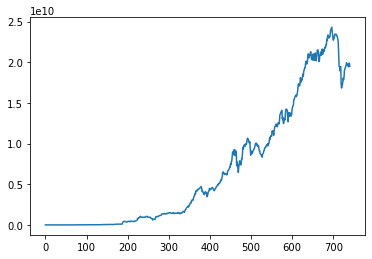

In [220]:
df_curve['Curve'].plot()

Currnt TVL is close to $19B across all chains. An absolute staggering amount! Making it one of the leading DeFi apps and the biggest DEX. Due to its scale this is why protocols desire to make their stablecoins have more liquidity and volume on Curve as it helps their overall adaption

In [221]:
print(df_curve['Curve'].iloc[-1])

19487744399.7121


Curve just on ETH

In [222]:
print(df_curve['Curve-ETH'].iloc[-1])

16838618137.6412


% of Curve's TVL on Ethereum

In [223]:
print(str(df_curve['Curve-ETH'].iloc[-1] / df_curve['Curve'].iloc[-1] * 100) + '%')

86.40619351457607%


Majority of Curve's TVL still comes from ETH, but I imagine due to Ethereum's gas fees the rise in Curve's TVL across other protocols will rise as well

### TVL for Convex

<AxesSubplot:>

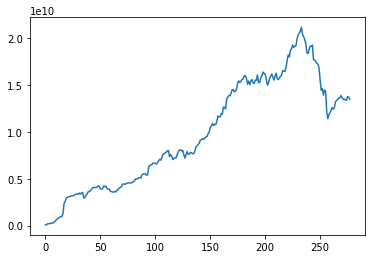

In [224]:
df_convex['Convex Finance'].plot()

As of right now, Convex is just on Ethereum

In [225]:
print(df_convex['Convex Finance'].iloc[-1])

13501863055.909


Comparison of Ratio of Convex to Curve TVL overtime

<AxesSubplot:>

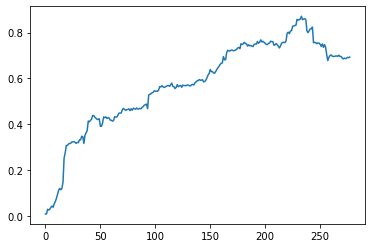

In [226]:
cvx_crv = df_convex[['Date','Convex Finance']].merge(df_curve[['Date','Curve']],on ='Date')
cvx_crv['Ratio'] = cvx_crv['Convex Finance'] / cvx_crv['Curve']
cvx_crv['Ratio'].plot()

In [227]:
cvx_crv['Ratio']

0      0.007831
1      0.007858
2      0.028016
3      0.024647
4      0.028580
         ...   
273    0.685770
274    0.687974
275    0.691772
276    0.690130
277    0.692839
Name: Ratio, Length: 278, dtype: float64

While Curve has has had a large head start, Convex has been rapidly catching up. In less than a year Convex has gone from 0 to .69 and has also become one of the largest players in the Defi Eccosystem! Convex's rise in power is thanks in part due to the power of its boosted pools that offer the max amount of rewards you would be able to get due to Convex's influence on Curve

#### Creating additional features for percent change, cumulative %, and the curve TVL not on Ethereum

In [228]:
#df_convex['Date'] = pd.to_datetime(df_convex['Date'])
df_convex['Daily % Change'] = df_convex['Convex Finance'].pct_change()
#df_curve['Date'] = pd.to_datetime(df_curve['Date'])
df_curve['Daily % Change'] = df_curve['Curve'].pct_change()
df_curve['Cumulative Sum %'] = df_curve['Daily % Change'].cumsum()
df_convex['Cumulative Sum %'] = df_convex['Daily % Change'].cumsum()
df_curve['Non ETH Curve TVL'] = df_curve['Curve'] - df_curve['Curve-ETH']
crv = df_convex[['Date','Convex Finance']].merge(df_curve[['Date','Curve','Daily % Change','Cumulative Sum %']],on ='Date')

## Daily % Change for Convex

<AxesSubplot:>

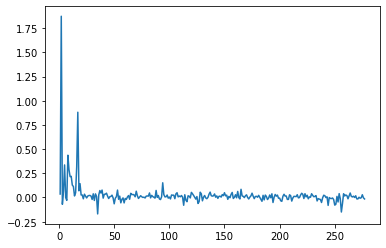

In [229]:
df_convex['Daily % Change'].plot()

# Daily % Change for Curve since Convex launch

<AxesSubplot:>

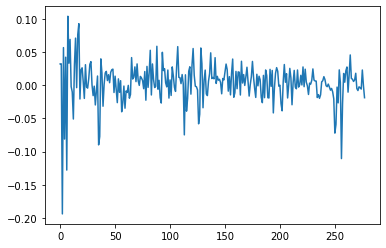

In [230]:
crv['Daily % Change'].plot()

Overall Statistics for % change for Convex + Histogram

In [231]:
df_convex['Daily % Change'].describe()

count    277.000000
mean       0.024399
std        0.135332
min       -0.169795
25%       -0.006599
50%        0.010853
75%        0.025910
max        1.874028
Name: Daily % Change, dtype: float64

<AxesSubplot:>

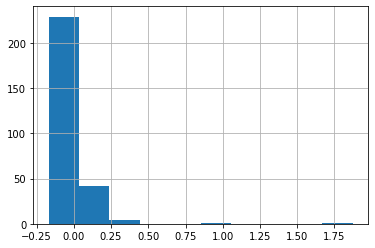

In [232]:
df_convex['Daily % Change'].hist()

Overall Statistics for % change for Convex + Histogram

In [233]:
crv['Daily % Change'].describe()

count    278.000000
mean       0.003444
std        0.030056
min       -0.193855
25%       -0.008624
50%        0.005122
75%        0.019845
max        0.103734
Name: Daily % Change, dtype: float64

<AxesSubplot:>

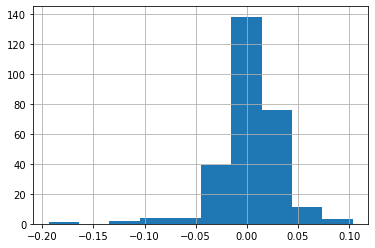

In [234]:
crv['Daily % Change'].hist()

After comparing the two TVLs since Convex's we can see that Curves % change in TVL (since its bigger and more established this makes sense). Convex has been much more only an average daily change of .3% where Convex has seen a daily increase of 2.5% (probably in part due to the large increases in the begininng) To double check this we will look at both the median's for TVL

In [235]:
print(crv['Daily % Change'].median())

0.005122278635944277


In [236]:
print(df_convex['Daily % Change'].median())

0.010852938910896226


So this actually wasnt the case! Further analysis may be needed here!

### Convex % TVL since Launch

Convex has seen an 700% + increase in TVL since launch! It will be absolute amazing to see where it goes by the end of the year

In [237]:
print(str(df_convex['Cumulative Sum %'].max() * 100) + '%')

717.4949297855013%


## Curve % TVL increase since Launch 

In that same time frame Curve, has had a bigger inrease in overall TVL

In [238]:
print(str(crv['Cumulative Sum %'].max() * 100) + '%')

2238.5049769372163%


# TVL Correlation Calculations for Curve, Convex, and Other DeFi Platforms

In this section we will now be answering the question, does the TVL for Convex and Correlate correlate and is it statistically significant?
How does this compare to other DeFi platforms (since crypto prices tend to correlate pretty strongly)

In [239]:
#Merging all the dataframes together

In [240]:
df_total = df_convex[['Date','Convex Finance']].merge(df_curve[['Date','Curve']], on = 'Date').merge(df_aave[['Date','AAVE']], on = 'Date').merge(df_uniswap[['Date','Uniswap']], on = 'Date').merge(df_compound[['Date','Compound']], on = 'Date').merge(df_yearn[['Date','Yearn Finance']], on = 'Date').merge(df_maker[['Date','MakerDAO']], on = 'Date')

df_total

,Date,Convex Finance,Curve,AAVE,Uniswap,Compound,Yearn Finance,MakerDAO
0,17/05/2021,6.887735e+07,8.795680e+09,1.211907e+10,9.127791e+09,1.100628e+10,4.351555e+09,1.483094e+10
1,18/05/2021,7.133614e+07,9.077859e+09,1.166424e+10,8.402541e+09,1.045659e+10,4.463577e+09,1.390149e+10
2,19/05/2021,2.050221e+08,7.318067e+09,1.224839e+10,8.719646e+09,1.057647e+10,3.745968e+09,1.404455e+10
3,20/05/2021,1.905626e+08,7.731759e+09,1.047952e+10,6.652654e+09,8.822460e+09,3.640799e+09,1.068264e+10
4,21/05/2021,2.030479e+08,7.104447e+09,1.069600e+10,7.377833e+09,8.789298e+09,3.401390e+09,1.144389e+10
...,...,...,...,...,...,...,...,...
271,13/02/2022,1.350575e+10,1.962439e+10,1.340312e+10,7.334807e+09,7.138573e+09,4.183381e+09,1.691217e+10
272,14/02/2022,1.340566e+10,1.954831e+10,1.330466e+10,7.245382e+09,6.983897e+09,4.183381e+09,1.684003e+10
273,15/02/2022,1.336981e+10,1.943360e+10,1.326397e+10,7.358130e+09,7.054297e+09,4.179206e+09,1.696476e+10
274,16/02/2022,1.375010e+10,1.987663e+10,1.377203e+10,7.783955e+09,7.543162e+09,4.173156e+09,1.790344e+10


In [241]:
corr = df_total.corr()
corr

,Convex Finance,Curve,AAVE,Uniswap,Compound,Yearn Finance,MakerDAO
Convex Finance,1.000000,0.992441,0.599994,0.679452,0.128558,0.441056,0.914526
Curve,0.992441,1.000000,0.638531,0.717005,0.152803,0.486641,0.939714
AAVE,0.599994,0.638531,1.000000,0.812066,0.680248,0.742819,0.733516
Uniswap,0.679452,0.717005,0.812066,1.000000,0.683120,0.777618,0.862379
Compound,0.128558,0.152803,0.680248,0.683120,1.000000,0.726448,0.327428
Yearn Finance,0.441056,0.486641,0.742819,0.777618,0.726448,1.000000,0.600181
MakerDAO,0.914526,0.939714,0.733516,0.862379,0.327428,0.600181,1.000000


So the correlation for TVL is a whopping .99! This is a very strong correlation for TVL!! This makes sense due to the strong relationship both share. The next highest correlation is also with Convex and MakerDAO. Is this due to both of their parts in Curve Wars? Suprisingly some of the DeFi apps do not have a very strong correlation (Compound - MakerDAO, Compound - Convex, Yearn-Convex)

<AxesSubplot:>

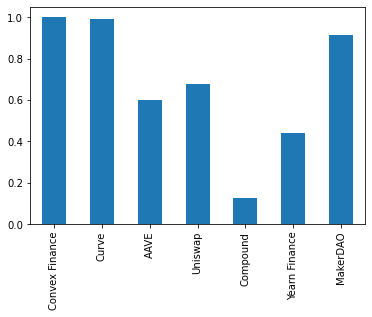

In [242]:
convex_corr = corr['Convex Finance']
convex_corr.plot.bar()

In [243]:
#Printing Output files

In [244]:
df_curve.to_csv('Curve Clean.csv')
df_convex.to_csv('Convex Clean.csv')
corr.to_csv('Correlation in Defi.csv')